# [Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/description)

## Objective: build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year

## Goal:

1. Reduce unnecessary insurance cost, improve driver's willingness to buy vehicle insurance
2. Help insurance company to price their insurance produce more accurately, improve customer analysis and gain competitive advantage
3. Narrow down customer feature extraction area and reduce research cost, and speed up claim response

## Proposal

**Business Analysis**: Reseach project background in kaggle discussion board to gain a better understanding on features and the project itself.

**Data Analysis**: Analyze features to see if there is similarity in between. Determine which features are useful to the project. Determin ways to analyze features, such as data visualization. Determine which models are to be used to make predictions. 

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [29]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [31]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [35]:
def check_data(df):
    #check dataframe's first 5 and last 5 rows at once
    return df.head().append(df.tail())

check_data(train)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [51]:
#randomely select 5 samples from each target value:
positive_sample = train[train.target==1].sample(n=5, random_state=123)
negative_sample = train[train.target==0].sample(n=5, random_state=123)

sample = pd.concat([positive_sample, negative_sample]).reset_index()
sample

,index,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,354540,885885,1,2,1,9,0,0,0,1,...,6,1,1,7,0,1,0,1,1,0
1,131166,327764,1,7,3,7,0,0,0,0,...,13,1,1,8,0,0,1,0,0,0
2,166021,415019,1,2,1,5,0,5,0,1,...,3,2,2,14,0,1,1,0,0,0
3,339529,848228,1,5,1,2,0,0,0,0,...,4,1,6,8,0,0,0,1,1,1
4,299986,749566,1,1,1,6,1,0,1,0,...,10,3,3,11,0,0,1,0,0,0
5,379320,947975,0,1,2,1,0,0,1,0,...,4,2,5,5,0,1,0,0,0,0
6,33180,83183,0,1,1,4,0,0,0,1,...,3,0,4,14,0,1,1,0,0,0
7,60616,151937,0,0,1,6,0,0,1,0,...,7,1,3,4,0,0,1,0,1,0
8,254795,636826,0,0,1,3,0,0,1,0,...,3,0,2,9,0,1,1,0,0,0
9,372085,929986,0,0,1,5,1,0,0,0,...,6,3,2,9,0,0,0,0,1,1


In [54]:
sample_group = sample.groupby('target')
list(sample.groupby('target'))

[(0,
      index      id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
  5  379320  947975       0          1              2          1              0   
  6   33180   83183       0          1              1          4              0   
  7   60616  151937       0          0              1          6              0   
  8  254795  636826       0          0              1          3              0   
  9  372085  929986       0          0              1          5              1   
  
     ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ...  ps_calc_11  ps_calc_12  \
  5              0              1              0  ...           4           2   
  6              0              0              1  ...           3           0   
  7              0              1              0  ...           7           1   
  8              0              1              0  ...           3           0   
  9              0              0              0  ...           6           3   
  
     

In [60]:
sample_group.ngroups

2

In [62]:
sample_group.size()

target
0    5
1    5
dtype: int64

meaning on feature name:
1. ind: individual
2. red: region
3. car: vehicle info
4. calc: calculated info
5. bin: binary value
6. -1 in values: missing value

In [65]:
sample_group.first()

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,,,,,,,,,,,,,,,,,,,,,
0,379320,947975,1,2,1,0,0,1,0,0,...,4,2,5,5,0,1,0,0,0,0
1,354540,885885,2,1,9,0,0,0,1,0,...,6,1,1,7,0,1,0,1,1,0


In [66]:
sample_group.last()

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,,,,,,,,,,,,,,,,,,,,,
0,372085,929986,0,1,5,1,0,0,0,0,...,6,3,2,9,0,0,0,0,1,1
1,299986,749566,1,1,6,1,0,1,0,0,...,10,3,3,11,0,0,1,0,0,0


In [70]:
sample_group.get_group(1)

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,354540,885885,2,1,9,0,0,0,1,0,...,6,1,1,7,0,1,0,1,1,0
1,131166,327764,7,3,7,0,0,0,0,0,...,13,1,1,8,0,0,1,0,0,0
2,166021,415019,2,1,5,0,5,0,1,0,...,3,2,2,14,0,1,1,0,0,0
3,339529,848228,5,1,2,0,0,0,0,1,...,4,1,6,8,0,0,0,1,1,1
4,299986,749566,1,1,6,1,0,1,0,0,...,10,3,3,11,0,0,1,0,0,0


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [10]:
df_train.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_train['target'].value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

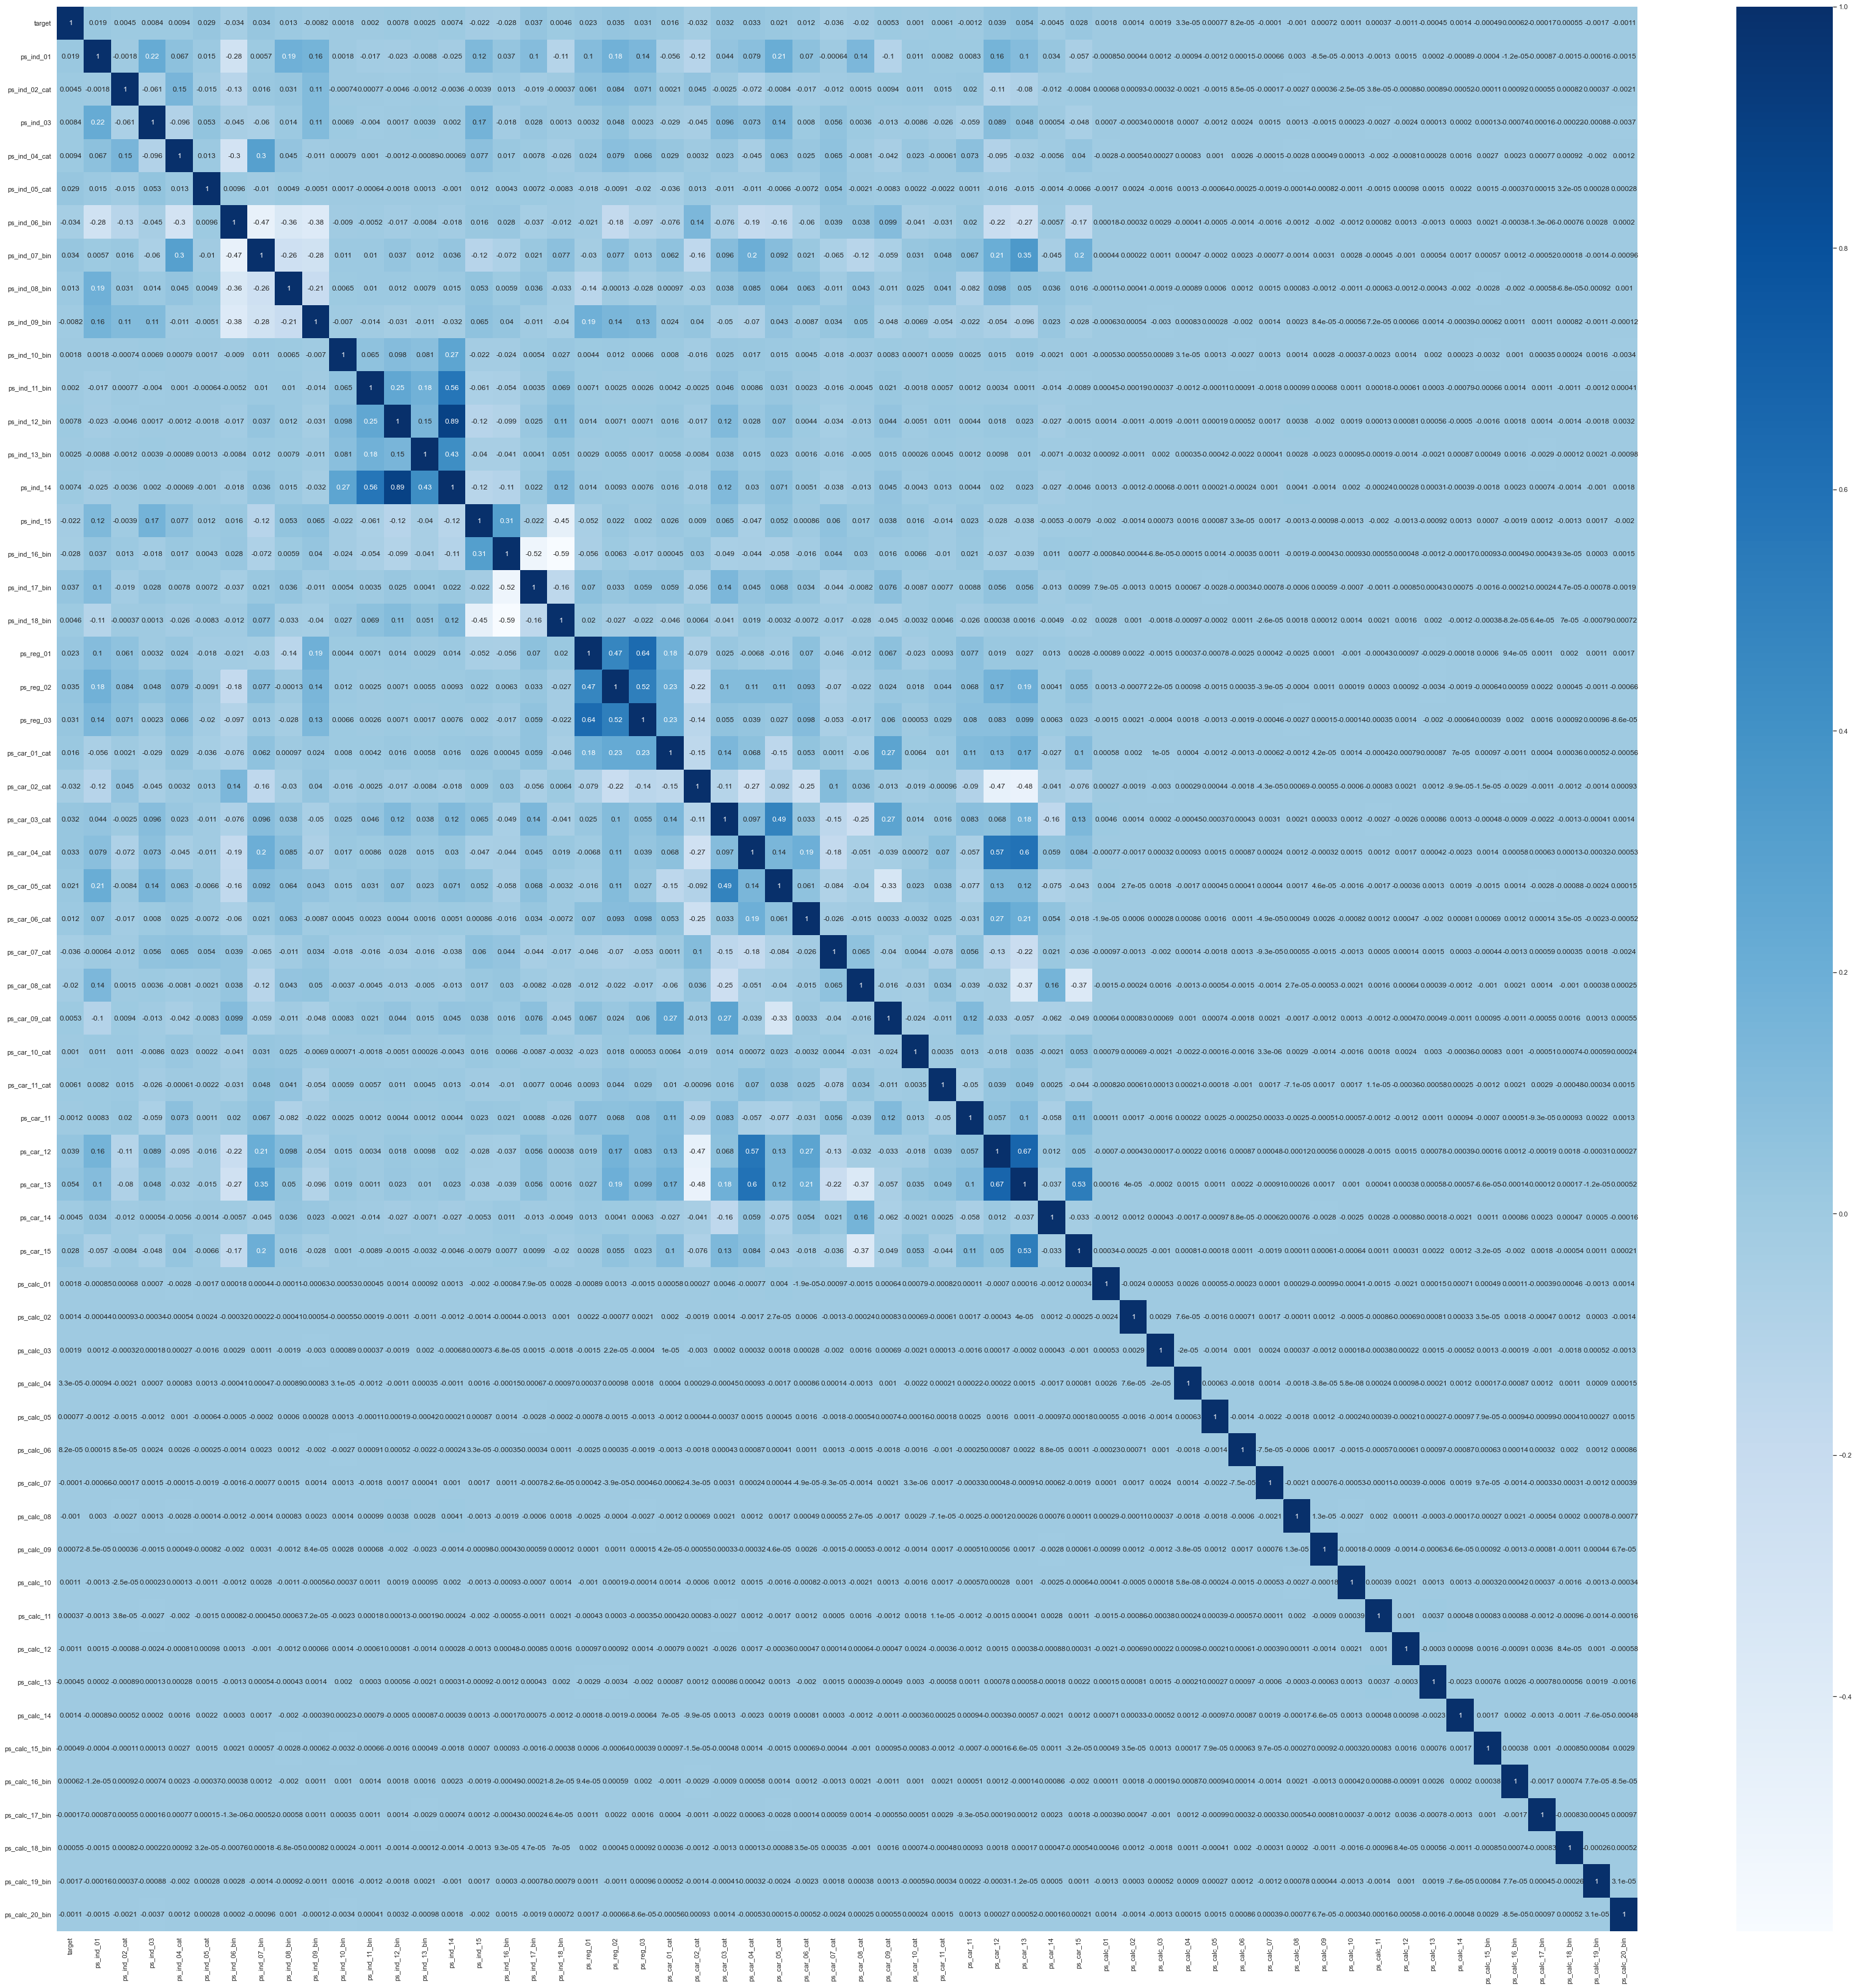

In [20]:
cor = df_train.iloc[:,:58].corr();
plt.figure(figsize=(58,58))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

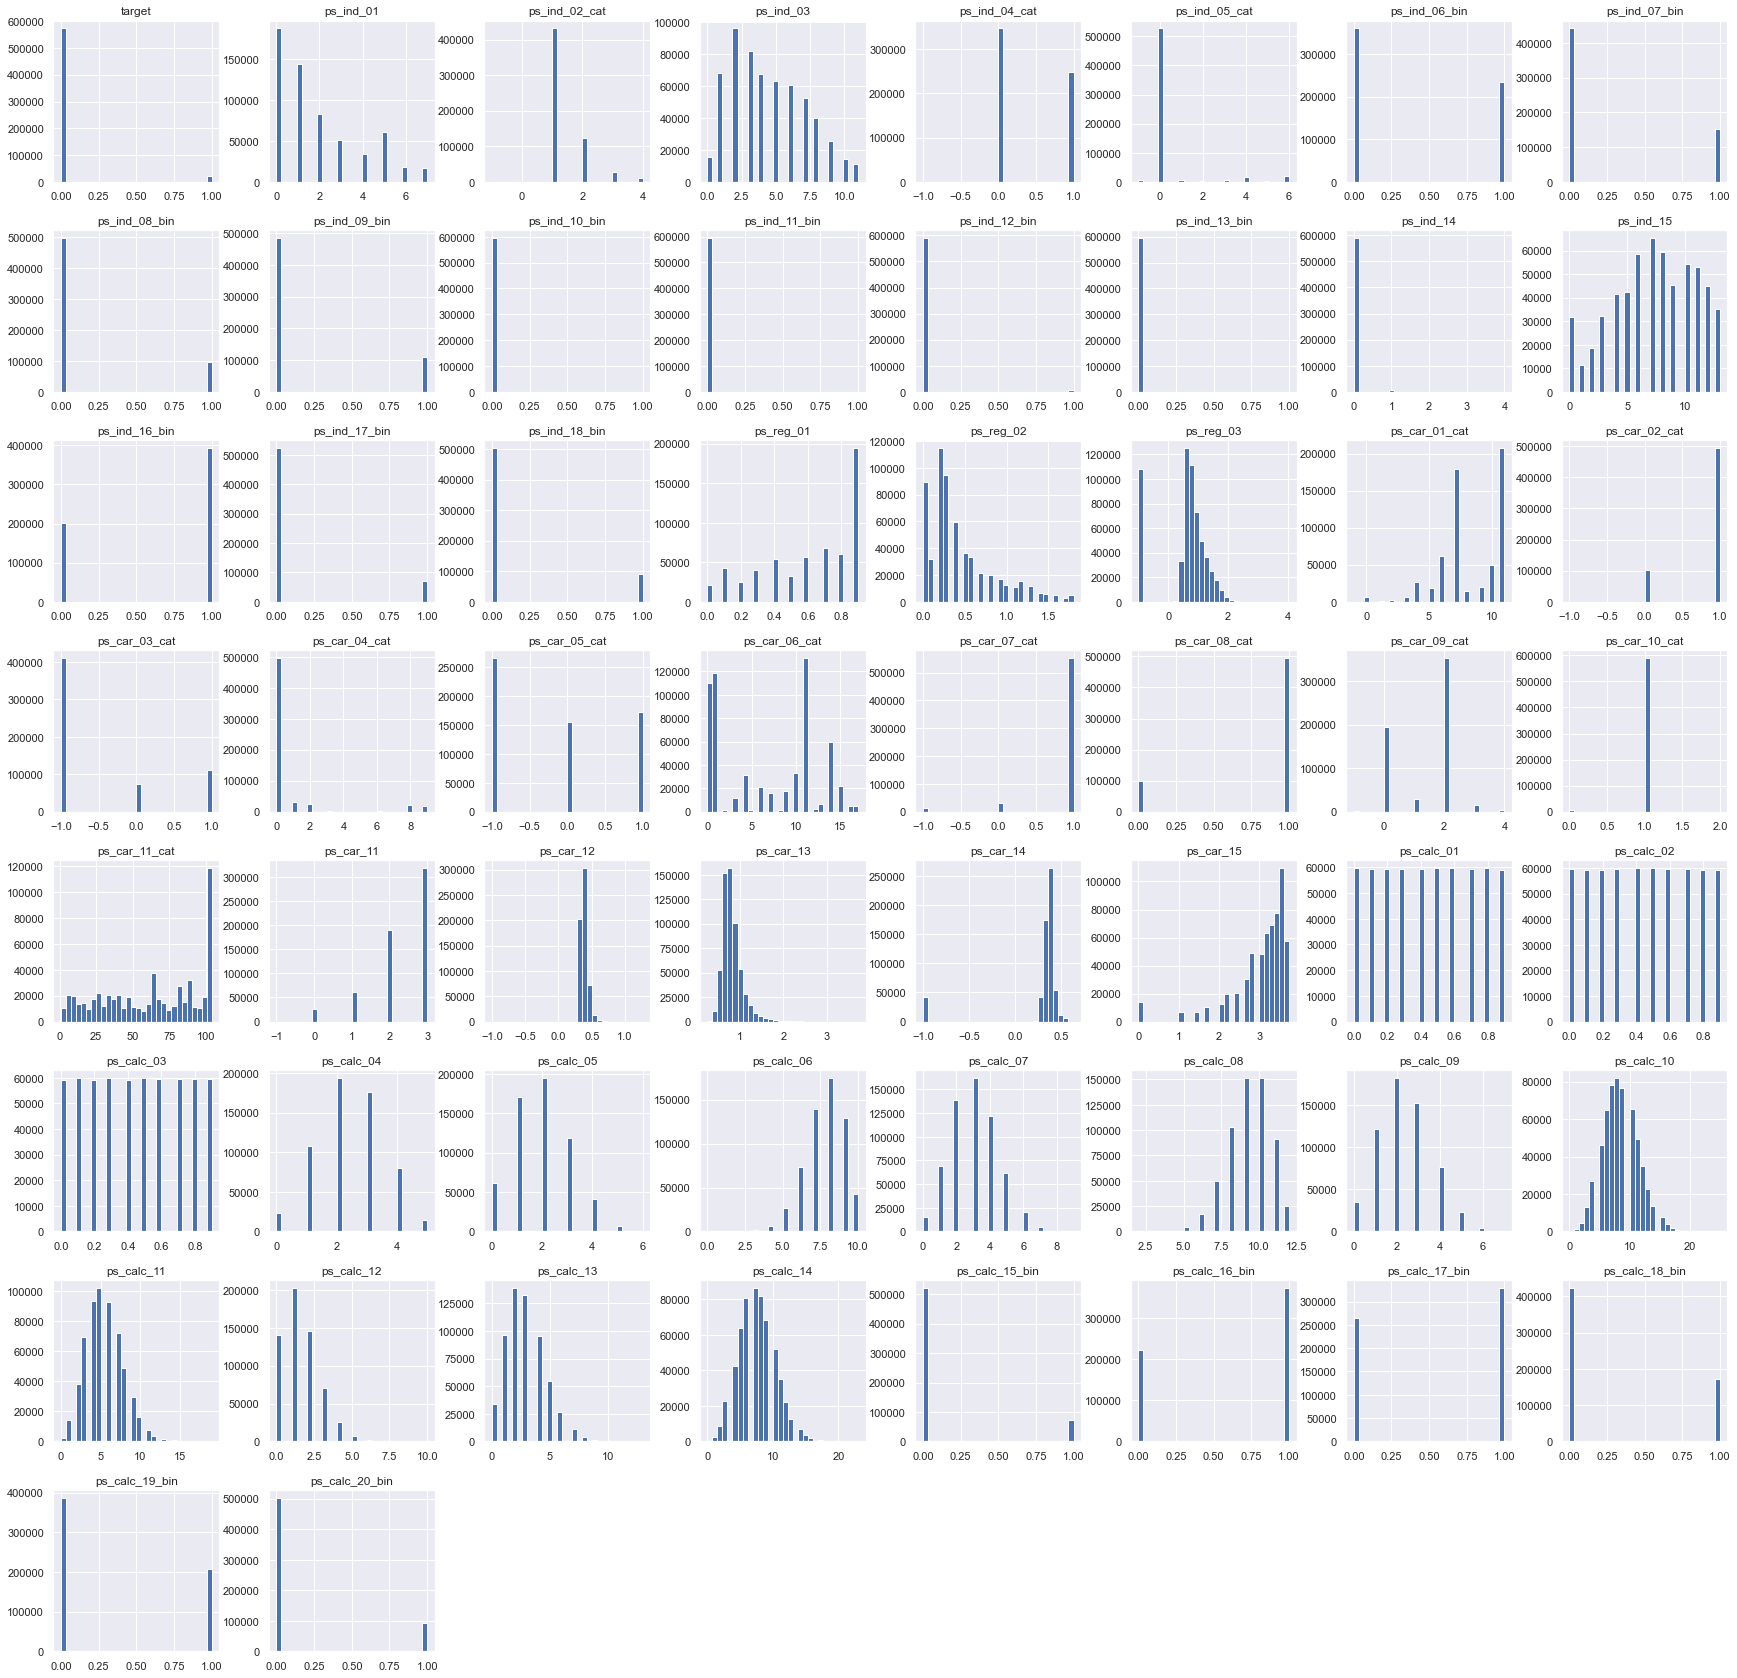

In [23]:
df_train.hist(figsize=(30,30), bins=30);